In [ ]:
import numpy as np         # For creating matrices and for number operations
import pandas as pd        # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns      # To plot heatmaps
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(["Name" , "PassengerId"] , axis = 1 , inplace = True)

In [ ]:
df["Embarked"].fillna("S" , inplace = True)

In [ ]:
df.drop(["Cabin"] , axis = 1 , inplace = True)

In [ ]:
df.drop(["Ticket"] , axis = 1 , inplace = True)
median = df["Age"].median()
df["Age"].fillna(median , inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Age" , "Fare"]] = scaler.fit_transform(df[["Age" , "Fare"]])

In [ ]:
df = pd.get_dummies(df , columns = ["Sex" , "Embarked"] , prefix = ["Sex" , "Embarked"])

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,1,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,1,0.434531,1,0,0.103644,1,0,0,0,1
4,0,3,0.434531,0,0,0.015713,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [ ]:
df.shape

(891, 11)

In [ ]:
x = df.drop(["Survived"] , axis = 1)
y = df["Survived"]
x.shape , y.shape

((891, 10), (891,))

In [ ]:
x = x[x.columns].values
x

array([[3.        , 0.27117366, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.4722292 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [3.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [3.        , 0.34656949, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.32143755, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [3.        , 0.39683338, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
y = y.ravel()
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation ="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
h = model.fit(x , y  , batch_size = 32 , epochs = 150 , verbose = 1)

Epoch 1/150
28/28 [==============================] - 1s 1ms/step - loss: 0.6325 - accuracy: 0.6457
Epoch 2/150
28/28 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7839
Epoch 3/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.8150
Epoch 4/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.7892
Epoch 5/150
28/28 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8075
Epoch 6/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.8143
Epoch 7/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8227
Epoch 8/150
28/28 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8000
Epoch 9/150
28/28 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8102
Epoch 10/150
28/28 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8183
Epoch 11/

Text(0.5, 0, 'epoch')

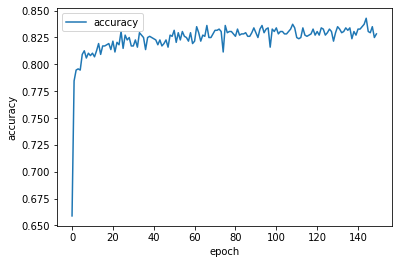

In [ ]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

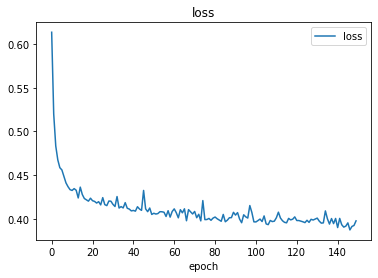

In [ ]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
passengers = test["PassengerId"]
test.drop(["Name" , "PassengerId" , "Cabin" , "Ticket"] , axis = 1 , inplace = True)
test["Age"].fillna(df["Age"].median() , inplace = True)  
test["Fare"].fillna(df["Fare"].median() , inplace = True)

In [ ]:
test[["Age" , "Fare"]] = scaler.transform(test[["Age" , "Fare"]])
test = pd.get_dummies(test , columns = ["Sex" , "Embarked"] , prefix = ["Sex" , "Embarked"])

In [84]:
preds = model.predict(test)
preds = tf.round(preds)
preds = preds.numpy()
preds = preds.flatten().astype(int)
preds

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
data = {"PassengerId" : passengers , 
        "Survived" : preds}

final = pd.DataFrame(data , columns = ["PassengerId" , "Survived"])
final.head()        

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [89]:
final.to_csv("Titanic_neural.csv" , index = False)

In [90]:
files.download("Titanic_neural.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>